In [60]:
from funda_scraper import FundaScraper
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# scraper = FundaScraper(area="amsterdam", want_to="buy", find_past=True,n_pages = 40)
# df = scraper.run()
# df.head()
# df.to_csv("funda_sample_ams.csv")

In [61]:
df = pd.read_csv("funda_sample_ams.csv",index_col=0)
print(df)

     house_id       city   house_type    building_type    price  price_m2  \
0    88466438  amsterdam  appartement  Resale property   450000    5921.1   
1    42094688  amsterdam  appartement  Resale property  1175000    9179.7   
2    42082503  amsterdam  appartement  Resale property  1140000    6551.7   
3    42061411  amsterdam  appartement  Resale property   360000    5294.1   
4    42008138  amsterdam  appartement  Resale property   725000    6304.3   
..        ...        ...          ...              ...      ...       ...   
584  42919157  amsterdam         huis  Resale property   750000    5067.6   
585  88465031  amsterdam  appartement  Resale property   425000    7870.4   
586  88495909  amsterdam  appartement  Resale property   480000    8727.3   
587  42082905  amsterdam  appartement  Resale property   975000    7500.0   
588  42074900  amsterdam  appartement  Resale property   800000    7692.3   

     room  bedroom  bathroom  living_area  ... year_built  house_age  \
0  

In [62]:
# print(df.dtypes.to_markdown())

**No missing Values**

In [63]:
# print(df.isnull().sum().to_markdown())

c:\Users\nemet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\nemet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


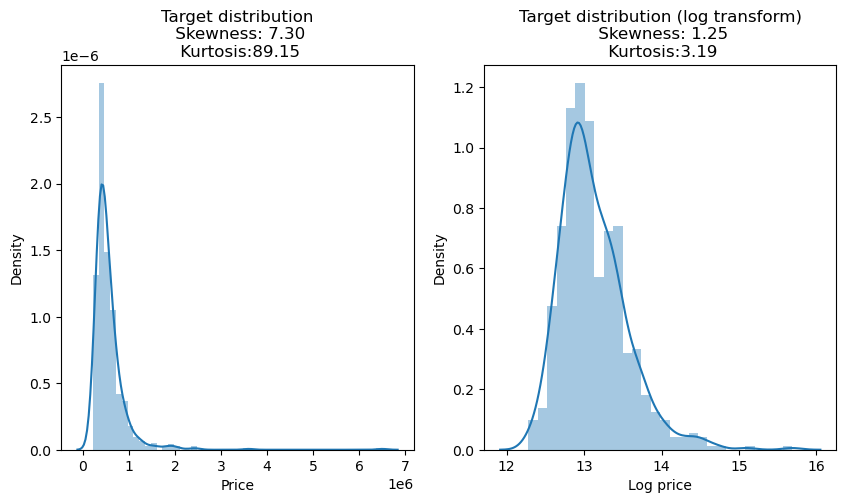

In [64]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.distplot(np.log(df["price"]),kde=True,ax=ax[1])
sns.distplot(df["price"],kde=True,ax=ax[0])
ax[0].set_title("Target distribution\n Skewness: {:.2f}\n Kurtosis:{:.2f}".format(df["price"].skew(), df["price"].kurt()))
ax[1].set_title("Target distribution (log transform)\n Skewness: {:.2f}\n Kurtosis:{:.2f}".format(np.log(df["price"]).skew(), np.log(df["price"]).kurt()))

ax[1].set_xlabel("Log price")
ax[0].set_xlabel("Price")

plt.show()

### Removing Outliers

Z-Score >3

In [65]:
# removing outliers by z score
df_clean = df[(np.abs(stats.zscore(df["price"])) < 3)]

In [66]:
print("{} outlier removed".format(df.shape[0]-df_clean.shape[0]))

10 outlier removed


c:\Users\nemet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\nemet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Price')

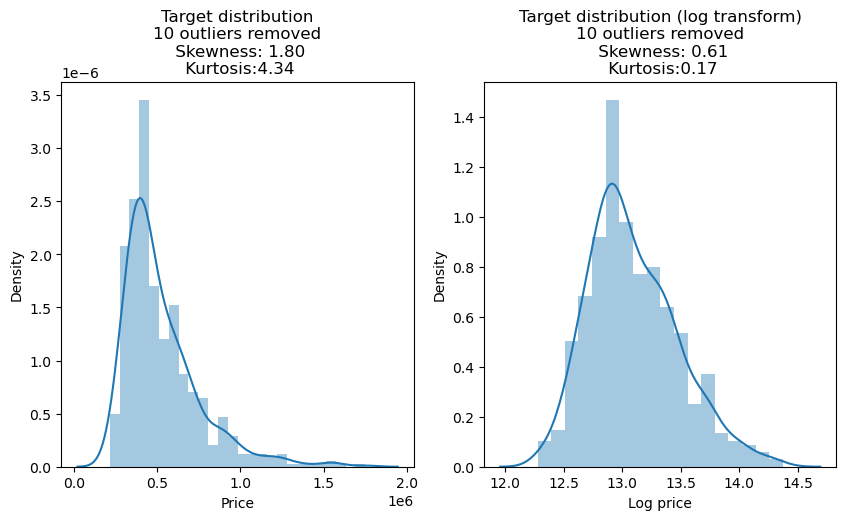

In [67]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.distplot(np.log(df_clean["price"]),kde=True,ax=ax[1])
sns.distplot(df_clean["price"],kde=True,ax=ax[0])
ax[0].set_title("Target distribution\n10 outliers removed\n Skewness: {:.2f}\n Kurtosis:{:.2f}".format(df_clean["price"].skew(), df_clean["price"].kurt()))
ax[1].set_title("Target distribution (log transform)\n10 outliers removed\n Skewness: {:.2f}\n Kurtosis:{:.2f}".format(np.log(df_clean["price"]).skew(), np.log(df_clean["price"]).kurt()))

ax[1].set_xlabel("Log price")
ax[0].set_xlabel("Price")

In [68]:
print(df_clean.columns)
df_reg = df_clean.drop(["house_id","city","zip","address","year_built","price_m2","date_list","ym_list","ym_sold","year_sold","date_sold","term_days","year_list","descrip"],axis=1)

Index(['house_id', 'city', 'house_type', 'building_type', 'price', 'price_m2',
       'room', 'bedroom', 'bathroom', 'living_area', 'energy_label',
       'has_balcony', 'has_garden', 'zip', 'address', 'year_built',
       'house_age', 'date_list', 'ym_list', 'year_list', 'descrip', 'ym_sold',
       'year_sold', 'term_days', 'date_sold'],
      dtype='object')


### Label Encoding

In [69]:
# print(df_reg)

In [70]:
# Label encoding
df_reg = df_reg.apply(lambda x: x.astype('category').cat.codes)

In [71]:
# print(df_reg)

### Feature Correlations

C:\Users\nemet\AppData\Local\Temp\ipykernel_9944\3328205265.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


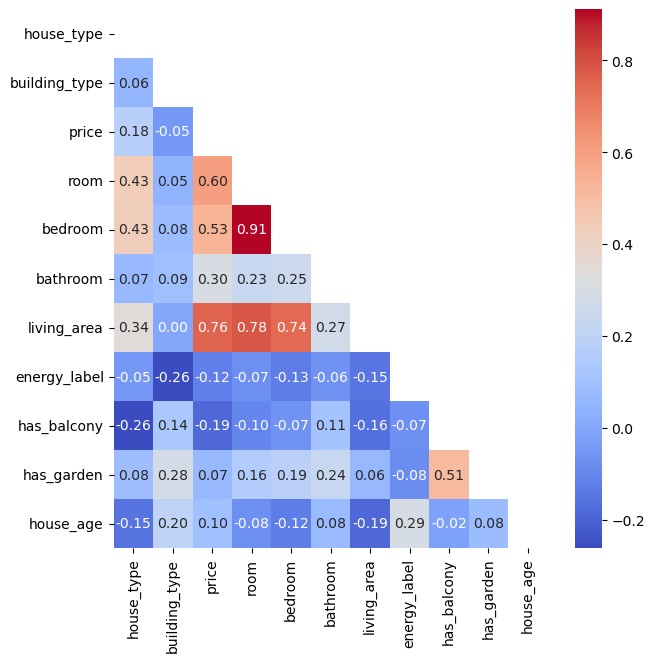

In [72]:
fig,ax = plt.subplots(figsize=(7,7))
df_corr = df_reg.corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
ax = sns.heatmap(df_corr,annot=True,fmt=".2f",cmap="coolwarm",mask=mask)

In [73]:
# print(df_corr['price'].sort_values(ascending=False).to_markdown())

##### Feature Correlations to Price:

|        Feature       |      Pearson Correlation |
|:--------------|-----------:|
| price         |  1         |
| living_area   |  0.759141  |
| room          |  0.599967  |
| bedroom       |  0.531842  |
| bathroom      |  0.300023  |
| house_type    |  0.176126  |
| house_age     |  0.0971439 |
| has_garden    |  0.073118  |
| building_type | -0.0491919 |
| energy_label  | -0.117029  |
| has_balcony   | -0.186739  |

# Standard Scaling

In [74]:
# standardizing

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test = train_test_split(df_reg.drop("price",axis=1),df_reg["price"],test_size=0.2,random_state=42)

In [76]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(463, 10)
(116, 10)
(463,)
(116,)


In [77]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

### Multivariate Regression

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [79]:
reg = LinearRegression().fit(X_train_scaled, y_train)

In [80]:
reg.score(X_train_scaled, y_train)

0.6779076934731152

In [81]:
y_pred = reg.predict(scaler.transform(X_test))

In [82]:
r2_score(y_test,y_pred)

0.6737955792490584

In [83]:
mean_squared_error(y_test,y_pred)

410.56343909580517

In [84]:
root_mean_squared_error = np.sqrt(mean_squared_error(y_test,y_pred))
root_mean_squared_error

20.262365091365943

In [85]:
# !pip install xgboost

### Baseline Ensemble

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [95]:
models = [RandomForestRegressor(),SVR(),Ridge(),Lasso(),XGBRegressor()]
names = []
r2_scores = []
rmses = []
maes = []
mses = []

for model in models:
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(scaler.transform(X_test))
    print(model.__class__.__name__)
    print("R2 score: {:.2f}".format(r2_score(y_test,y_pred)))
    
    print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test,y_pred))))
    print("MAE: {:.2f}".format(mean_absolute_error(y_test,y_pred)))
    print("")
    names.append(model.__class__.__name__)
    rmses.append(np.sqrt(mean_squared_error(y_test,y_pred)))
    maes.append(mean_absolute_error(y_test,y_pred))
    r2_scores.append(r2_score(y_test,y_pred))
    mses.append(mean_squared_error(y_test,y_pred))
print(mses)
names[0] = "Random Forest"

RandomForestRegressor
R2 score: 0.73
RMSE: 18.48
MAE: 13.98

SVR
R2 score: 0.40
RMSE: 27.38
MAE: 22.13

Ridge
R2 score: 0.67
RMSE: 20.26
MAE: 15.63

Lasso
R2 score: 0.66
RMSE: 20.69
MAE: 16.00

XGBRegressor
R2 score: 0.69
RMSE: 19.91
MAE: 14.83

[341.53597979956896, 749.7952358056863, 410.41247869179045, 428.0926801680709, 396.3084]


C:\Users\nemet\AppData\Local\Temp\ipykernel_9944\748578620.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(names,rotation=45)
C:\Users\nemet\AppData\Local\Temp\ipykernel_9944\748578620.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(names,rotation=45)
C:\Users\nemet\AppData\Local\Temp\ipykernel_9944\748578620.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(names,rotation=45)


Text(0, 0.5, 'R2 score')

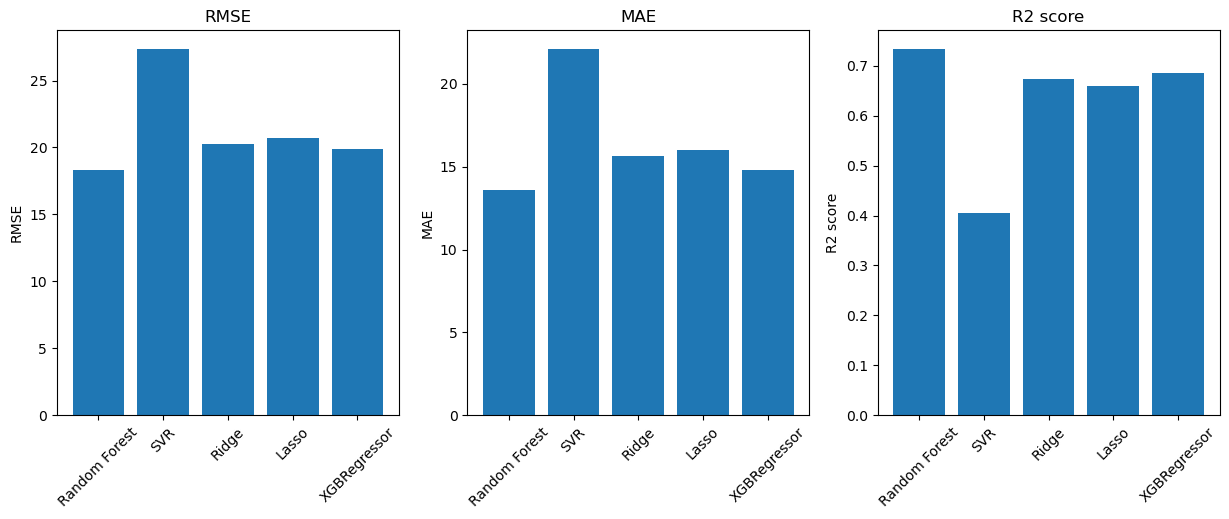

In [88]:
# bar plot of scores

fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].bar(names,rmses)
ax[1].bar(names,maes)
ax[2].bar(names,r2_scores)

ax[0].set_title("RMSE")
ax[1].set_title("MAE")
ax[2].set_title("R2 score")

ax[0].set_xticklabels(names,rotation=45)
ax[1].set_xticklabels(names,rotation=45)
ax[2].set_xticklabels(names,rotation=45)

ax[0].set_ylabel("RMSE")
ax[1].set_ylabel("MAE")
ax[2].set_ylabel("R2 score")

### Fine tuning with randomized search CV

In [89]:
# RandomSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [90]:

X, y = X_train_scaled, y_train

# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': np.arange(5, 15, 1),
    'min_samples_split': np.arange(2, 11, 1),
    'min_samples_leaf': np.arange(1, 6, 1)
}

param_grid_svr = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': np.arange(1, 6, 1)
}

param_grid_ridge = {
    'alpha': np.logspace(-3, 3, 7),
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

param_grid_lasso = {
    'alpha': np.logspace(-3, 3, 7),
    'max_iter': np.arange(1000, 10000, 1000)
}

param_grid_xgb = {
    'learning_rate': np.logspace(-3, 0, 4),
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': np.arange(3, 10, 1),
    'min_child_weight': np.arange(1, 6, 1),
    'gamma': np.arange(0, 1, 0.1),
    'subsample': np.arange(0.1, 1.1, 0.1),
    'colsample_bytree': np.arange(0.1, 1.1, 0.1),
    'reg_alpha': np.logspace(-3, 3, 7),
    'reg_lambda': np.logspace(-3, 3, 7)
}

# Create model objects
rf = RandomForestRegressor()
svr = SVR()
ridge = Ridge()
lasso = Lasso()
xgb = XGBRegressor()

# Create randomized search cross-validation objects
rf_randomized_search = RandomizedSearchCV(rf, param_distributions=param_grid_rf, n_iter=100, cv=5, n_jobs=-1)
svr_randomized_search = RandomizedSearchCV(svr, param_distributions=param_grid_svr, n_iter=100, cv=5, n_jobs=-1)
ridge_randomized_search = RandomizedSearchCV(ridge, param_distributions=param_grid_ridge, n_iter=100, cv=5, n_jobs=-1)
lasso_randomized_search = RandomizedSearchCV(lasso, param_distributions=param_grid_lasso, n_iter=100, cv=5, n_jobs=-1)
xgb_randomized_search = RandomizedSearchCV(xgb, param_distributions=param_grid_xgb, n_iter=100, cv=5, n_jobs=-1)

# Fit models to data



In [91]:
rf_randomized_search.fit(X, y)
svr_randomized_search.fit(X, y)
ridge_randomized_search.fit(X, y)
lasso_randomized_search.fit(X, y)
xgb_randomized_search.fit(X, y)

c:\Users\nemet\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 49 is smaller than n_iter=100. Running 49 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\nemet\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 63 is smaller than n_iter=100. Running 63 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_child_weight': array([1, 2, 3, 4, 5]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190]),
                                        'reg_alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'reg_lambda': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'subsample': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [92]:
print("RF: ",rf_randomized_search.best_params_)
print("SVR: ",svr_randomized_search.best_params_)
print("Ridge: ",ridge_randomized_search.best_params_)
print("Lasso: ",lasso_randomized_search.best_params_)
print("XGB: ",xgb_randomized_search.best_params_)

RF:  {'n_estimators': 120, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_depth': 14}
SVR:  {'kernel': 'linear', 'degree': 3, 'C': 10.0}
Ridge:  {'solver': 'lsqr', 'alpha': 10.0}
Lasso:  {'max_iter': 1000, 'alpha': 0.1}
XGB:  {'subsample': 0.7000000000000001, 'reg_lambda': 100.0, 'reg_alpha': 0.01, 'n_estimators': 140, 'min_child_weight': 4, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7000000000000001}


In [96]:
best_models = [rf_randomized_search.best_estimator_,svr_randomized_search.best_estimator_,ridge_randomized_search.best_estimator_,lasso_randomized_search.best_estimator_,xgb_randomized_search.best_estimator_]

r2_scores_cv = []
rmses_cv = []
mae_cv = []
mses_cv =[]

for model in best_models:
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(scaler.transform(X_test))
    print(model.__class__.__name__)
    print("R2 score: {:.2f}".format(r2_score(y_test,y_pred)))
    print("RMSE: {:.2f}".format(np.sqrt(mean_squared_error(y_test,y_pred))))
    print("MAE: {:.2f}".format(mean_absolute_error(y_test,y_pred)))
    r2_scores_cv.append(r2_score(y_test,y_pred))
    rmses_cv.append(np.sqrt(mean_squared_error(y_test,y_pred)))
    mae_cv.append(mean_absolute_error(y_test,y_pred))
    mses_cv.append(mean_squared_error(y_test,y_pred))

    
    
    


RandomForestRegressor
R2 score: 0.72
RMSE: 18.62
MAE: 14.11
SVR
R2 score: 0.68
RMSE: 20.22
MAE: 15.25
Ridge
R2 score: 0.67
RMSE: 20.25
MAE: 15.66
Lasso
R2 score: 0.67
RMSE: 20.27
MAE: 15.63
XGBRegressor
R2 score: 0.73
RMSE: 18.30
MAE: 14.70


[0 1 2 3 4]
[341.53597979956896, 749.7952358056863, 410.41247869179045, 428.0926801680709, 396.3084]


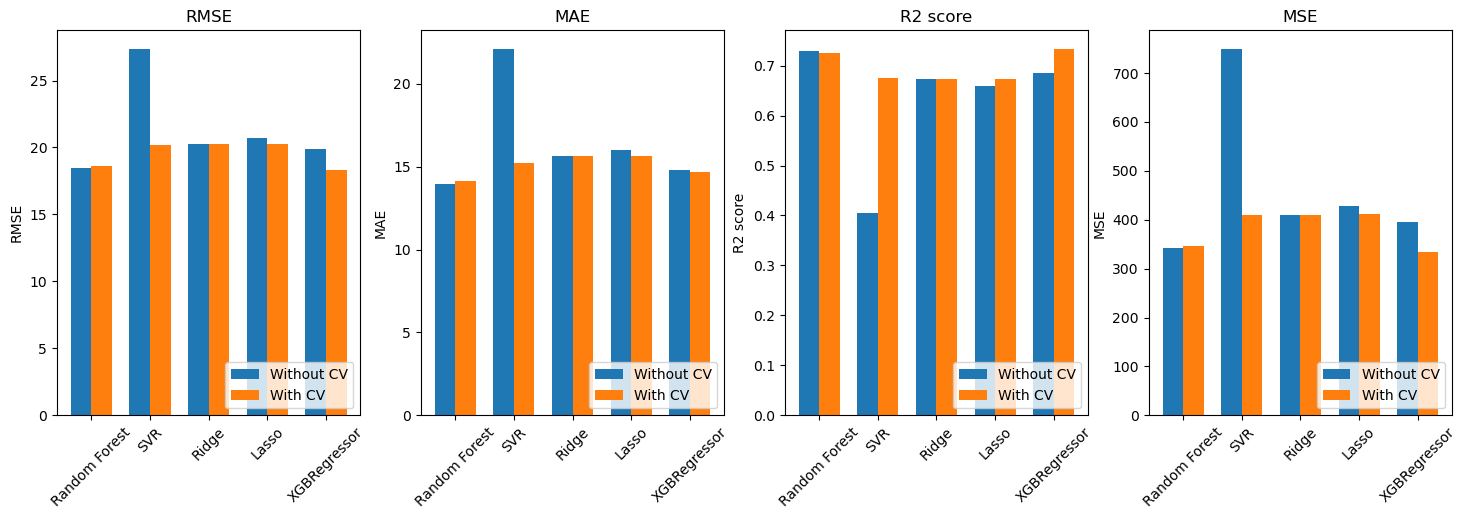

In [99]:
fig,ax = plt.subplots(1,4,figsize=(18,5))
indexes = np.arange(len(names))
bar_width = 0.35
print(indexes)
print(mses)
ax[0].bar(indexes,rmses,bar_width,label="Without CV")
ax[0].bar(indexes+0.35,rmses_cv,bar_width,label="With CV")
ax[0].set_xticks(indexes + bar_width / 2)

ax[1].bar(indexes,maes,bar_width,label="Without CV")
ax[1].bar(indexes+0.35,mae_cv,bar_width,label="With CV")
ax[1].set_xticks(indexes + bar_width / 2)

ax[2].bar(indexes,r2_scores,bar_width,label="Without CV")
ax[2].bar(indexes+0.35,r2_scores_cv,bar_width,label="With CV")
ax[2].set_xticks(indexes + bar_width / 2)

ax[3].bar(indexes,mses,bar_width,label="Without CV")
ax[3].bar(indexes+0.35,mses_cv,bar_width,label="With CV")
ax[3].set_xticks(indexes + bar_width / 2)




ax[0].set_title("RMSE")
ax[1].set_title("MAE")
ax[2].set_title("R2 score")
ax[3].set_title("MSE")


ax[0].set_xticklabels(names,rotation=45)
ax[1].set_xticklabels(names,rotation=45)
ax[2].set_xticklabels(names,rotation=45)
ax[3].set_xticklabels(names,rotation=45)



ax[0].set_ylabel("RMSE")
ax[1].set_ylabel("MAE")
ax[2].set_ylabel("R2 score")
ax[3].set_ylabel("MSE")


ax[0].legend(loc="lower right")
ax[1].legend(loc="lower right")
ax[2].legend(loc="lower right")
ax[3].legend(loc="lower right")
